In [1]:
#this script compares trajectories from both light conditions and computes complexity of path using box dimension analysis
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import csv
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import glob 
import seaborn as sns
sns.set(style="ticks")
import cv2
import pylab as pl
import time
#process images as linear interprolator and use sliding kernel to average more
# look to parrelelize this 

In [2]:
source =  r"E:\Downloads\ManducaMultiSenseData\Motion\Centroids_Filtered"
fig_path = r"E:\Downloads\ManducaMultiSenseData\Motion\Fractal_Dimension"

In [3]:
df = pd.read_csv(source + '/L0.1_c-3_m2_0_27647.csv')

In [4]:
x,y = df.X_position.values, df.Y_position.values
y_line = np.arange(0,488, (488/648))*2.4/75
x_line = np.arange(0,648, 1)*2.4/75

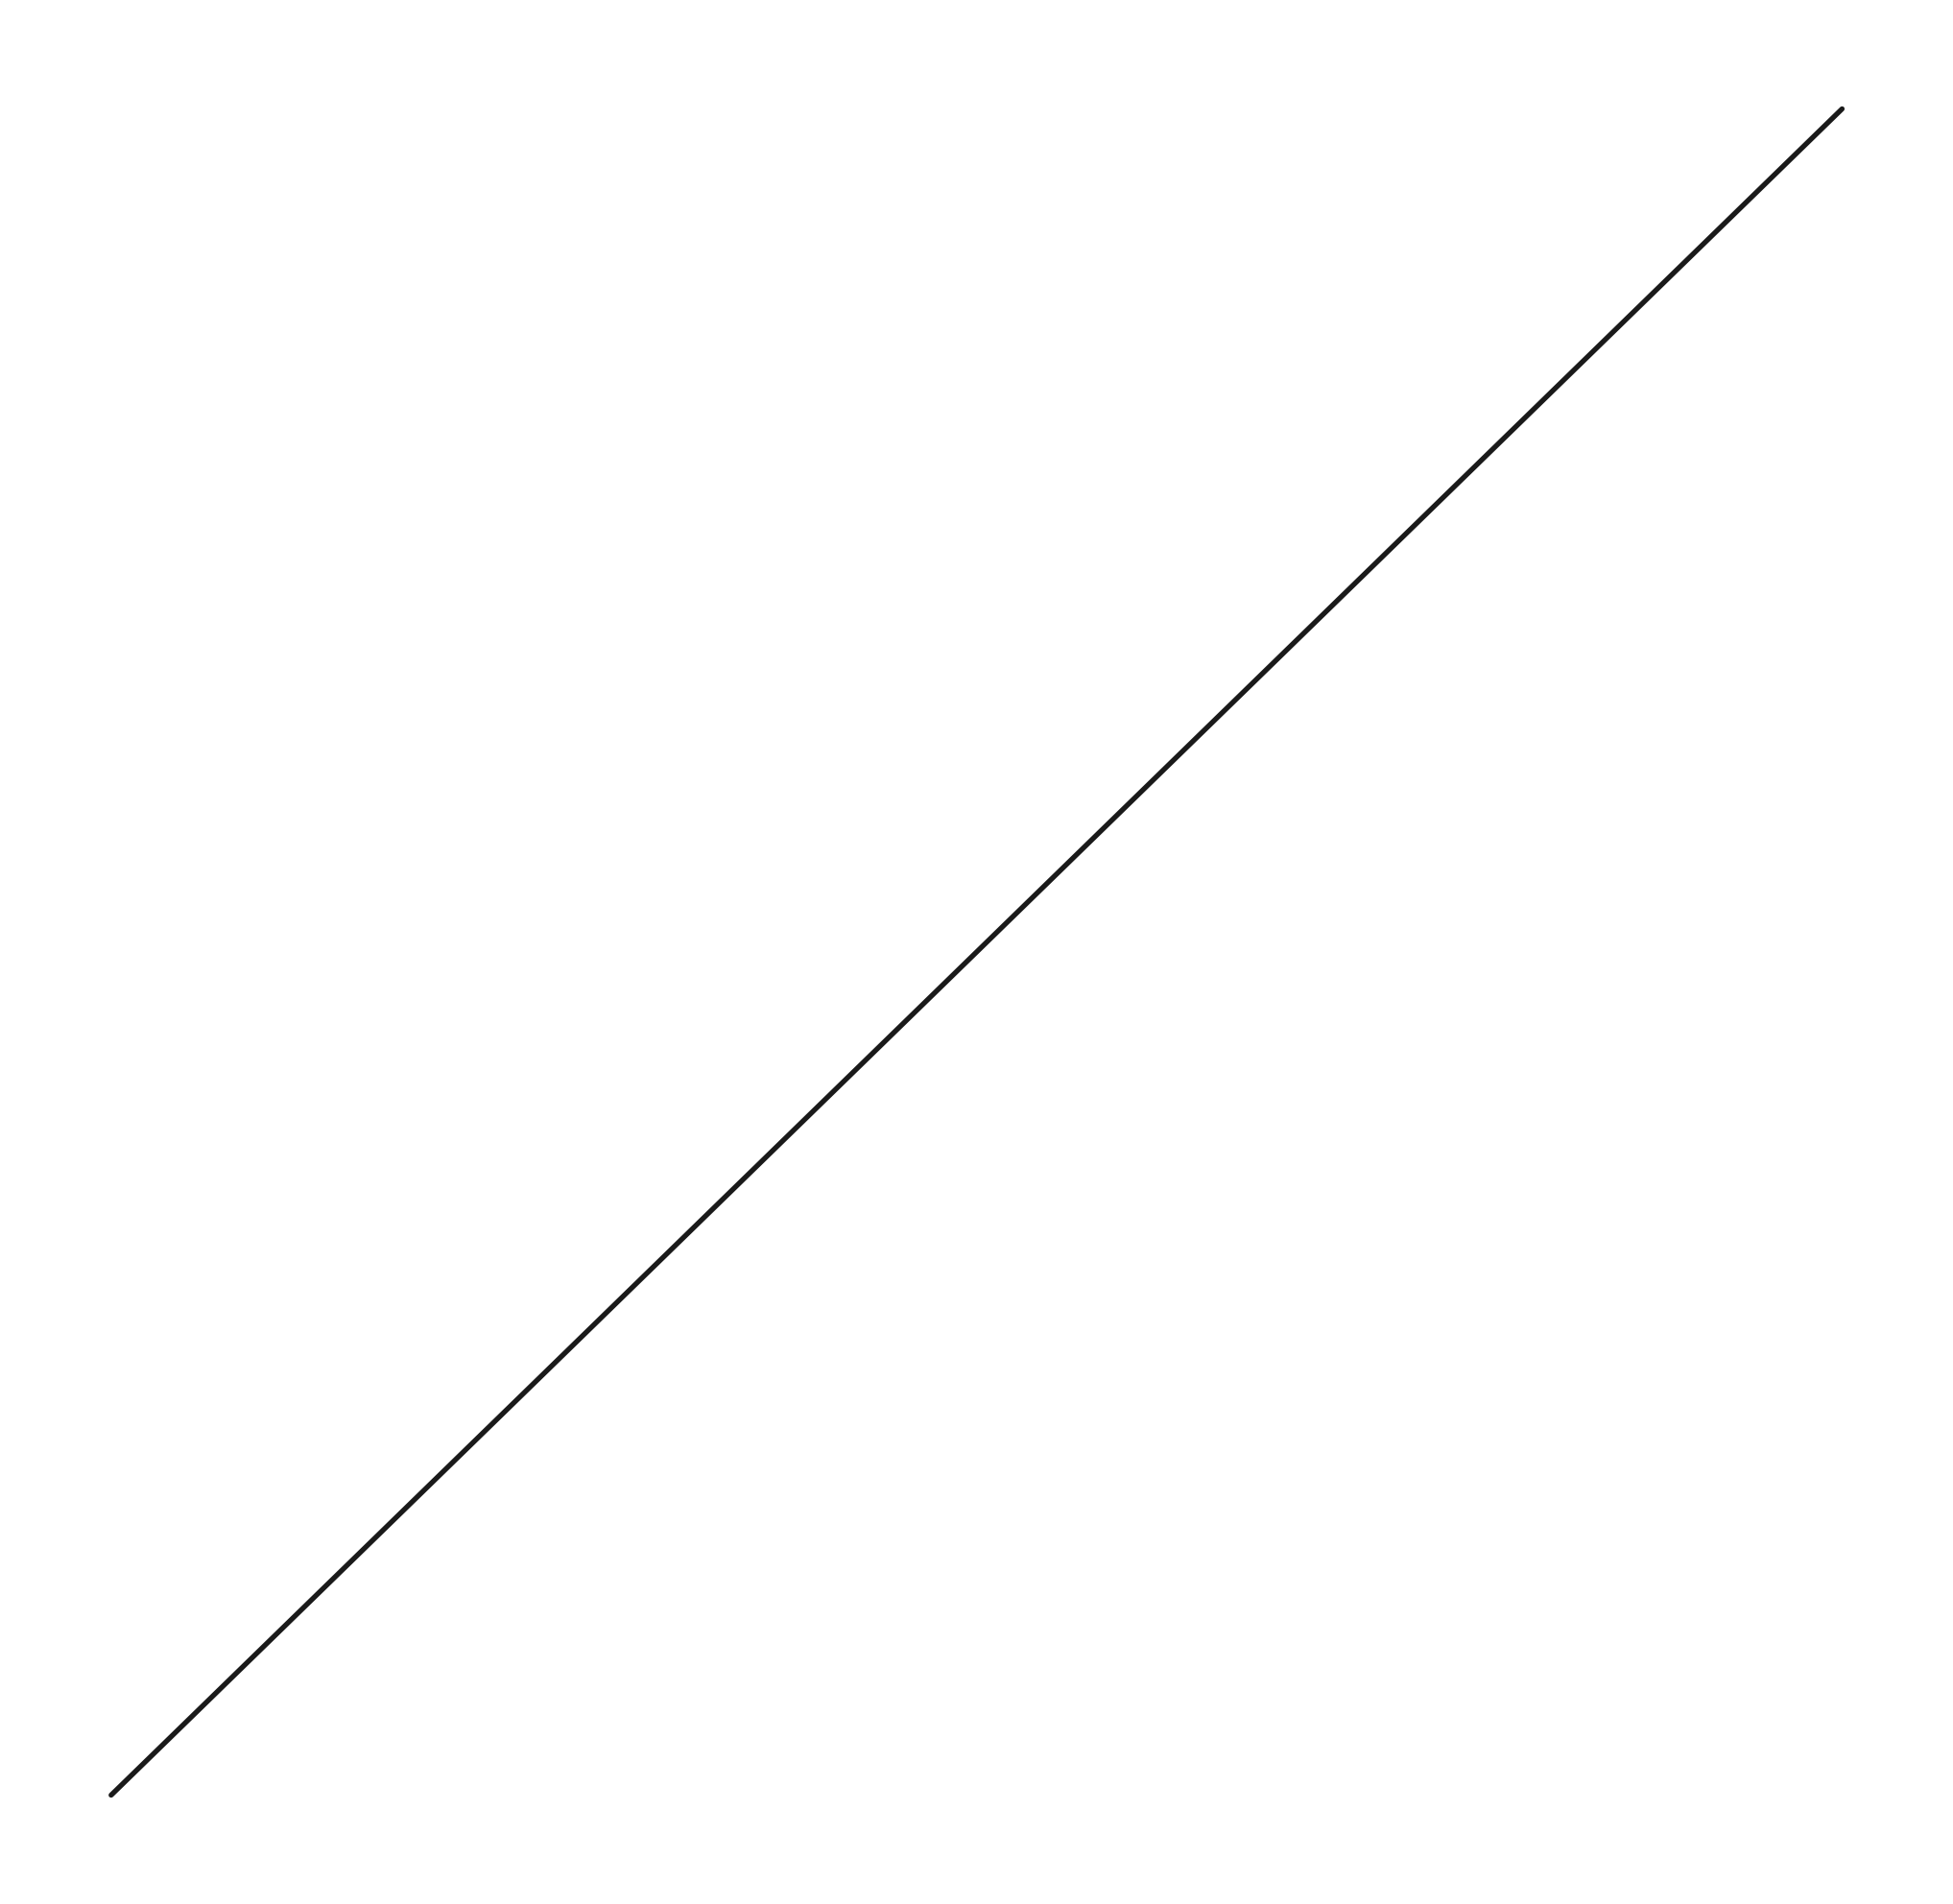

In [5]:
f, ax = plt.subplots(1,1,figsize = (10,10),  dpi= 256, sharex = True, sharey = True)
ax.grid(False)
ax.axis('off')
ax.plot(x_line,y_line, c= "k")
ax.set_ylabel("Y Position")
ax.set_xlabel("X Position")
pl.savefig(fig_path + "\\test.png")

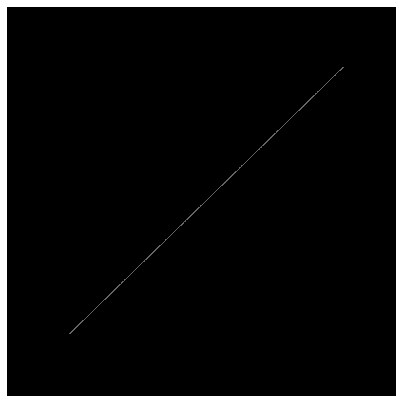

In [6]:
im = cv2.imread(fig_path + "\\test.png")
# im = cv2.imread(r"E:\Downloads\sierpinski.png")
im = (im < 255)*100
ax = plt.imshow(im, vmax = 200)
plt.axis('off')
plt.savefig(fig_path + "\\test2.png")

In [7]:
image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
x = np.where(image > 0)[1]
y = np.where(image > 0)[0]

number of boxes:4 out of 16 dimension: 1.0
number of boxes:8 out of 64 dimension: 1.0
number of boxes:16 out of 256 dimension: 1.0
number of boxes:32 out of 1024 dimension: 1.0
number of boxes:64 out of 4096 dimension: 1.0
number of boxes:128 out of 16384 dimension: 1.0


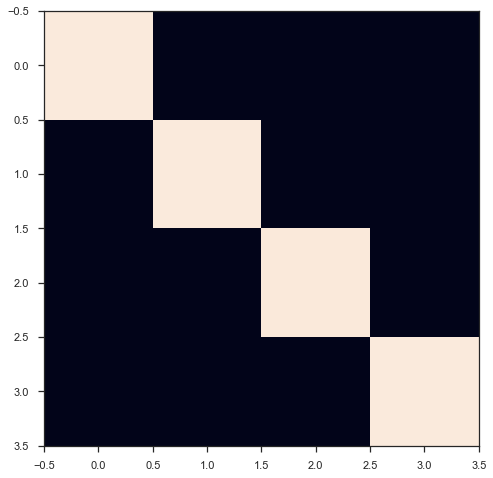

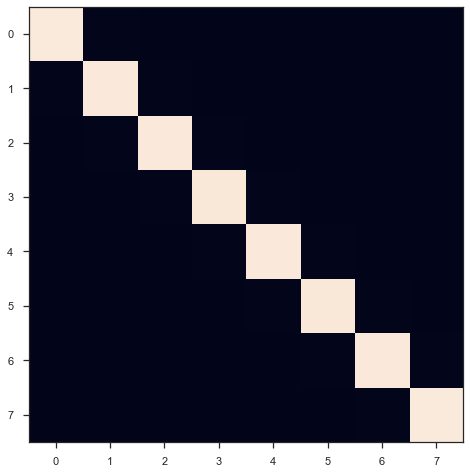

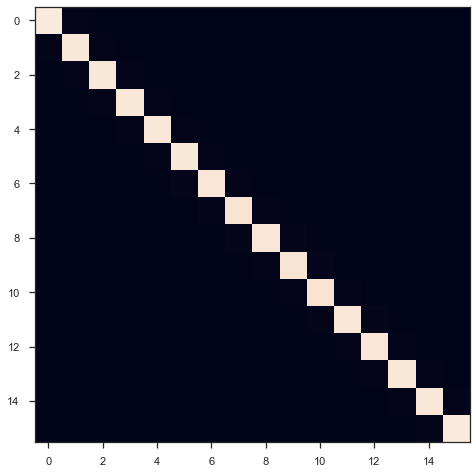

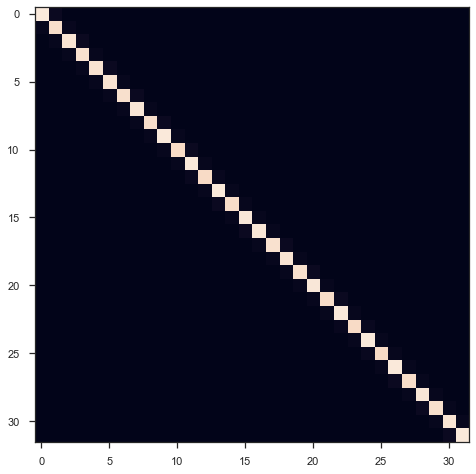

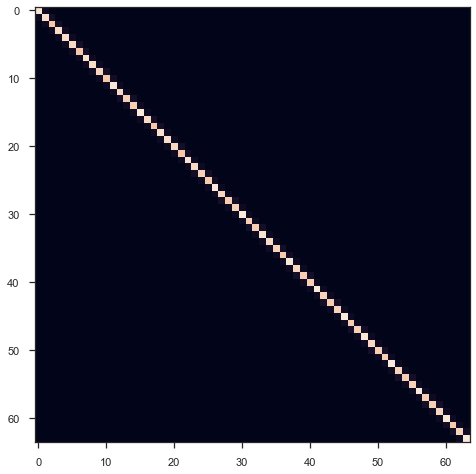

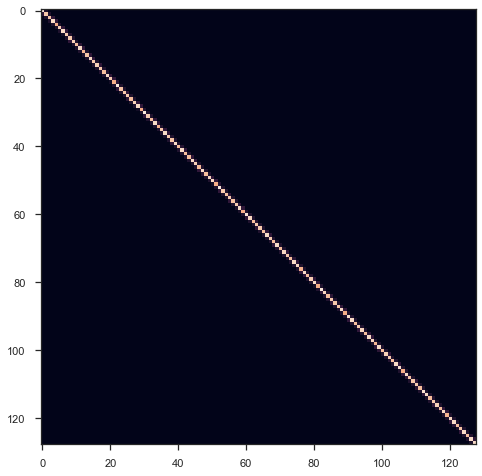

In [8]:
highest_power = 7 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
scale = np.logspace(2, highest_power, num = highest_power-1, base = 2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))

    if (np.log(np.max(heatmap))//np.log(10)-1) > 2:
        condition = heatmap >= 10**(np.log(np.max(heatmap))//np.log(10)-1)
    else:
        condition =  heatmap >= 10**(np.log(np.max(heatmap))//np.log(10))
    box_num = heatmap[condition]
    number_filled.append(float(len(box_num)))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes:" + str(len(box_num)) + " out of " + str(len(heatmap.ravel())) + " dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)
number_filled = np.asarray(number_filled)

In [9]:
np.max(heatmap)

120.0

Text(2, 4.352030263919617, 'dimension: 1.00')

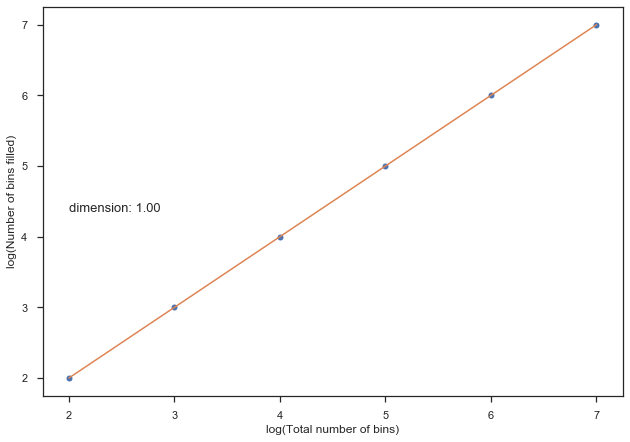

In [10]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale)/np.log(2), np.log(number_filled)/np.log(2), "o") 
b, m = polyfit((np.log(scale)/np.log(2)), (np.log(number_filled)/np.log(2)), 1) 
plt.plot((np.log(scale)/np.log(2)), b+ m*(np.log(scale)/np.log(2)))
plt.ylabel("log(Number of bins filled)")
plt.xlabel("log(Total number of bins)")
plt.text(2,np.max(np.log(number_filled))-.5, "dimension: " + "%.2f" % round(m, 2), size = 13)

In [11]:
df = pd.read_csv(source + '/L0.1_c-3_m10_0_20377.csv')

In [12]:
x_other,y_other = df.X_position.values, df.Y_position.values

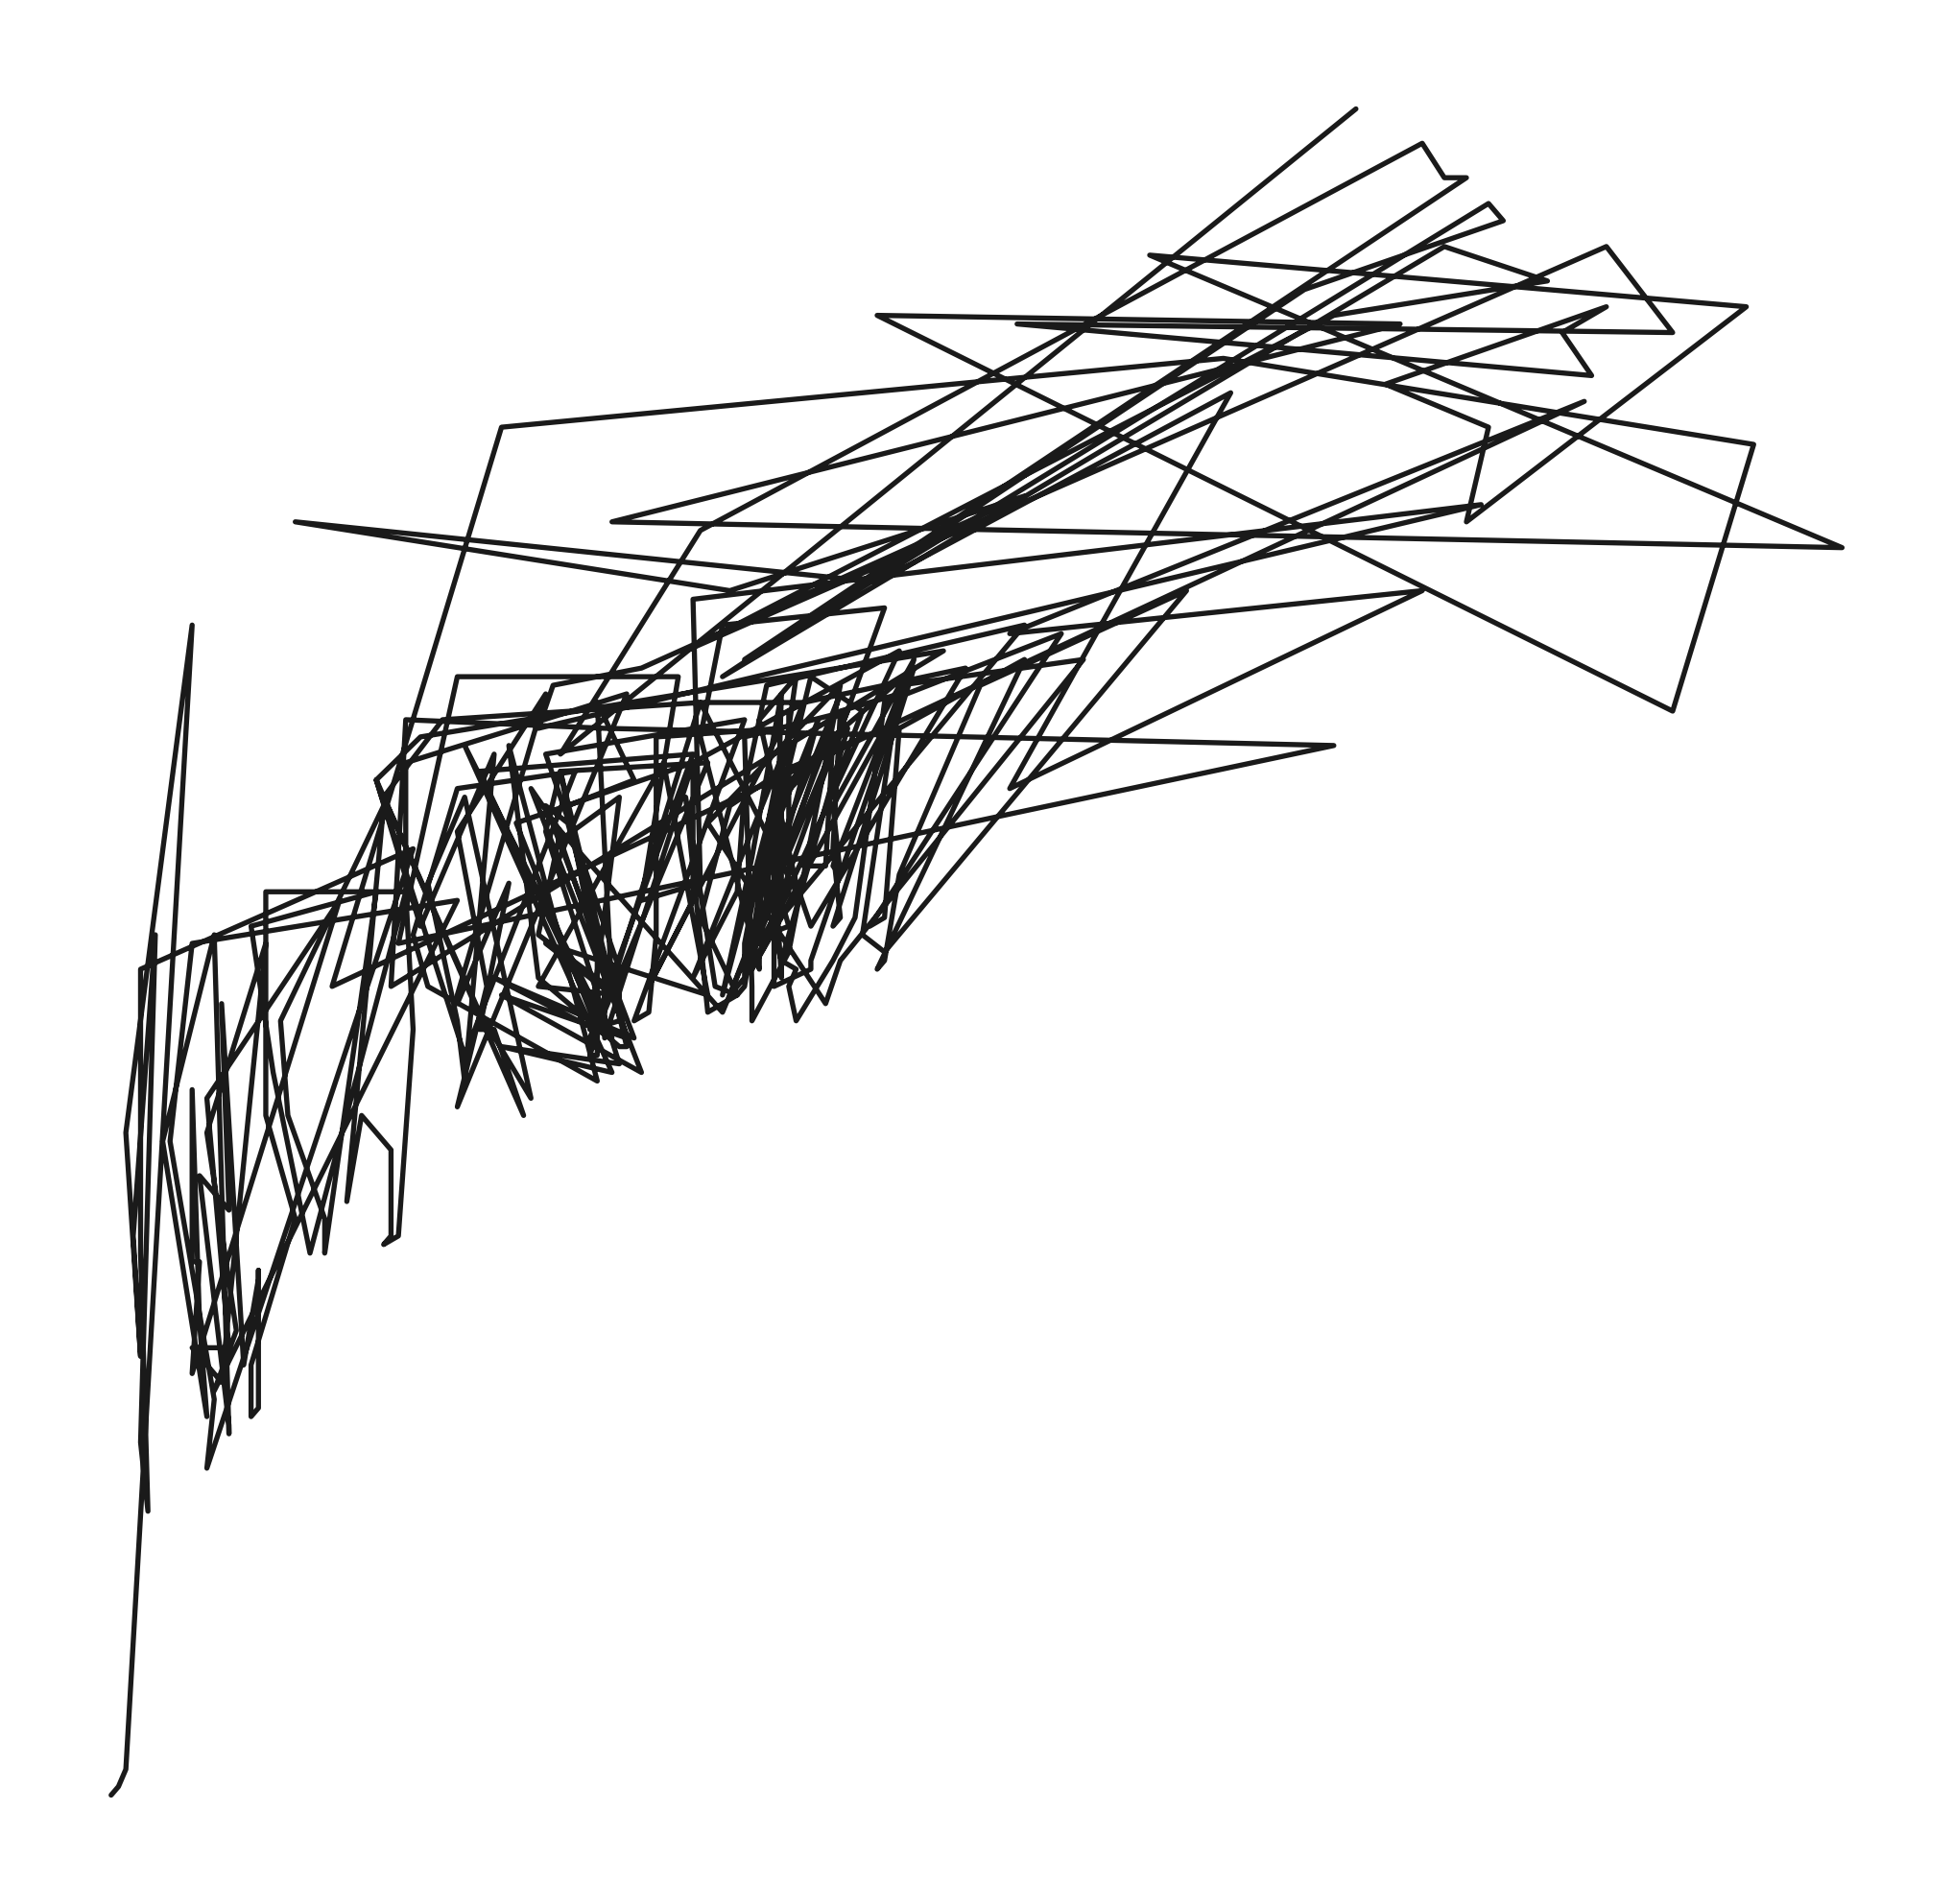

In [13]:
f, ax = plt.subplots(1,1,figsize = (10,10),  dpi= 256, sharex = True, sharey = True)
ax.grid(False)
ax.axis('off')
ax.plot(x_other,y_other, c= "k")
ax.set_ylabel("Y Position")
ax.set_xlabel("X Position")
pl.savefig(fig_path + "\\test3.png")

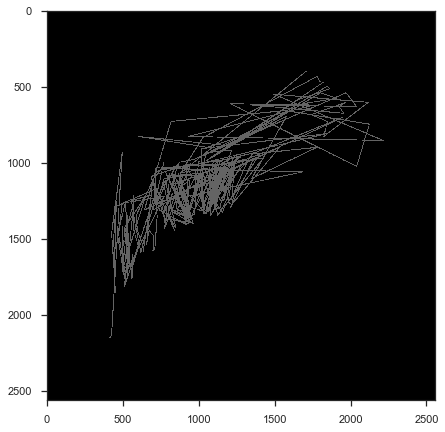

In [14]:
im = cv2.imread(fig_path + "\\test3.png")
im = (im < 255)*100
plt.imshow(im)

In [15]:
image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
x = np.where(image > 0)[1]
y = np.where(image > 0)[0]

In [16]:
highest_power = 8 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
scale = np.logspace(2, highest_power, num = highest_power-1, base = 2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))

    if (np.min(heatmap) == 0 and np.log(np.max(heatmap))/np.log(10) < 1):
        condition = heatmap > 0
    elif (np.log(np.max(heatmap))//np.log(10)-1) > 2:
        condition = heatmap >= 10**(np.log(np.max(heatmap))//np.log(10)-1)
    else:
        condition =  heatmap >= (10**(np.log(np.max(heatmap))//np.log(10) + 5)
    box_num = heatmap[condition]
    number_filled.append(float(len(box_num)))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes:" + str(len(box_num)) + " out of " + str(len(heatmap.ravel())) + " dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)
number_filled = np.asarray(number_filled)

SyntaxError: invalid syntax (<ipython-input-16-3bf66576b8b9>, line 16)

In [ ]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale), np.log(number_filled), "o") 
b, m = polyfit(np.log(scale), np.log(number_filled), 1) 
plt.plot(np.log(scale), b+ m*np.log(scale))
plt.ylabel("log(Number of bins filled)")
plt.xlabel("log(Total number of bins)")
plt.text(2,np.max(np.log(number_filled))-.5, "dimension: " + "%.2f" % round(m, 2), size = 13)
# looks like dimension is a bit off says its 1.72 but non of the actual values are? also how am I getting sub 1 dimensional values?

In [17]:
csv_list = glob.glob(source + "/*.csv")

In [21]:
condition = []
dimension = []
avg_len = []
highest_power = 7
t0 = time.time()
for element in csv_list: 
    if element[61:].startswith("L0.1"):
        condition.append("Low")
    else:
        condition.append("High")
    df = pd.read_csv(element)
    x_,y_ = df.X_position.values, df.Y_position.values
    avg_len.append(len(x_))
    f, ax = plt.subplots(1,1,figsize = (10,10),  dpi= 256, sharex = True, sharey = True)
    ax.grid(False)
    ax.axis('off')
    ax.plot(x_,y_, c= "k")
    ax.set_ylabel("Y Position")
    ax.set_xlabel("X Position")
    impath = "\\" + element[61:-4] + "track.png"
    pl.savefig(fig_path  + impath)
    plt.close()
    
    im = cv2.imread(fig_path + impath)
    im = (im < 255)*100
    
    image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
    x = np.where(image > 0)[1]
    y = np.where(image > 0)[0]
    
    scale = np.logspace(1, highest_power, num = highest_power, base = 2) #create a log scale. total number of boxes doubles each time
    number_filled = []
    highest_power = 7 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
    scale = np.logspace(2, highest_power, num = highest_power-1, base = 2) #create a log scale. total number of boxes doubles each time
    number_filled = []
    
    
    for b in scale:
        #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
        bins = b
        heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))

        if (np.log(np.max(heatmap))//np.log(10)-1) > 2:
            con = heatmap >= 10**(np.log(np.max(heatmap))//np.log(10)-1)
        else:
            con =  heatmap >= 10**(np.log(np.max(heatmap))//np.log(10))
        box_num = heatmap[con]
        number_filled.append(float(len(box_num)))
        
       
        
# #     f, ax = plt.subplots(1,2, figsize = (20,10))   
#     number_filled = np.asarray(number_filled)
    
    
# #     i_list = [0,1]
    
# #     for i in i_list:
# #         for tick in ax[i].get_yticklabels():
# #             tick.set_fontsize(20) 
# #         for tick in ax[i].get_xticklabels():
# #             tick.set_fontsize(20) 
            
    b, m = polyfit((np.log(scale)/np.log(2)), (np.log(number_filled)/np.log(2)), 1) 
    dimension.append(m)
# #     ax[0].plot(x_,y_, c = 'k')
# #     ax[0].set_ylabel("Y Position", size = 20)
# #     ax[0].set_xlabel("X Position", size = 20)
# #     ax[1].plot(np.log(scale)/np.log(2), np.log(number_filled)/np.log(2), "o") 
# #     ax[1].plot((np.log(scale)/np.log(2)), b+ m*(np.log(scale)/np.log(2)))
# #     ax[1].set_ylabel("log(Number of bins filled)", size = 20)
# #     ax[1].set_xlabel("log(Total number of bins)", size = 20)
# #     ax[1].text(3,np.max(np.log(number_filled)/np.log(2))-1, "dimension: " + "%.2f" % round(m, 2), size = 17)
# #     plt.savefig(fig_path + "\\TrajectoryComparison\\" + element[61:-4] + ".png")
# #     plt.close()
t1 = time.time()
print(t1-t0)
# new_df = pd.DataFrame({"condition": condition, "dimension": dimension})


1047.8936355113983


In [23]:
new_df = pd.DataFrame({"condition": condition, "dimension": dimension})

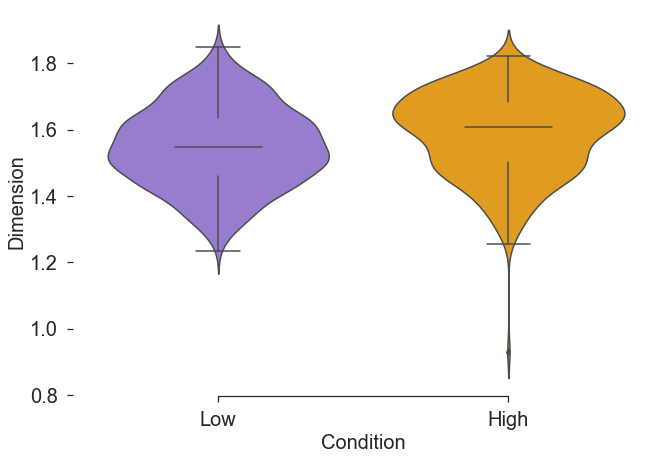

In [24]:
ax = sns.violinplot(x="condition", y="dimension", data = new_df, inner = None, palette = ['mediumpurple','orange'])
sns.boxplot(x="condition", y="dimension", data = new_df, width = 0.3)
plt.xlabel("Condition", size = 20)
plt.ylabel("Dimension", size = 20)
ax.set_xticklabels(["Low","High"], size = 20)
sns.despine(trim=True, left=True)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
plt.savefig(fig_path + "\DimensionComparison\dimensionComparison.png")